<a href="https://colab.research.google.com/github/Parkshinhyang/Programmers/blob/main/2%EA%B0%9C_%EC%9D%B4%ED%95%98%EB%A1%9C_%EB%8B%A4%EB%A5%B8_%EB%B9%84%ED%8A%B8(Lv_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 - 2개 이하로 다른 비트
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/77885)

## 문제 설명

양의 정수 x에 대한 함수 f(x)를 다음과 같이 정의합니다.

- x보다 크고 x와 비트가 1~2개 다른 수들 중에서 제일 작은 수

예를 들어,

- f(2) = 3 입니다. 다음 표와 같이 2보다 큰 수들 중에서 비트가 다른 지점이 2개 이하이면서 제일 작은 수가 3이기 때문입니다.

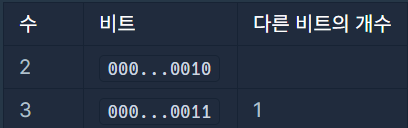

- f(7) = 11 입니다. 다음 표와 같이 7보다 큰 수들 중에서 비트가 다른 지점이 2개 이하이면서 제일 작은 수가 11이기 때문입니다.

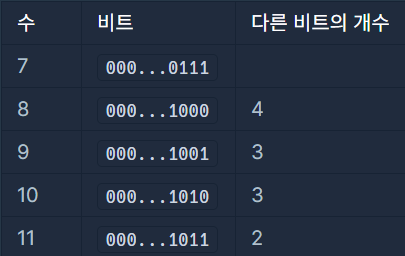

정수들이 담긴 배열 numbers가 매개변수로 주어집니다. numbers의 모든 수들에 대하여 각 수의 f 값을 배열에 차례대로 담아 return 하도록 solution 함수를 완성해주세요.


## 제한사항

- 1 ≤ numbers의 길이 ≤ 100,000
- 0 ≤ numbers의 모든 수 ≤ 10^15

## 입출력 예

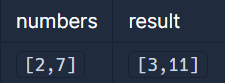

## 입출력 예 설명

### 입출력 예 #1

문제 예시와 같습니다.




## 첫 번째 방법

1. numbers를 number로 탐색하여 number가 짝수면 answer에 number + 1을 저장.
2, 홀수면 number을 2진수로 바꿔 작은 자릿수부터 젤 먼저 나온 0을 제외한 나머지를 1로 변환하고 num에 저장.
3. (number + num을 10진수로 바꾼 값 - num을 10진수로 바꾼 값 // 2)를 answer에 append 후 return.

결과 : 실패
-> 런타임 에러

In [14]:
def solution(numbers):
    answer = []
    num = ""
    for number in numbers:
        if number % 2 == 0:
            answer.append(number + 1)
        else:
            bin_num = bin(number)[2 : ]

            for i in range(-1, - (len(bin_num) + 1), -1):
                
                if bin_num[i] == '1':
                    num = '0' + num
                else:
                    num = '1' + num
                    
                if len(num) > 2 and num[0] == '0' and num[1] == '0':
                    break
            
            if num.count('0') == len(bin_num):
                num = '0b1' + num
            answer.append(number + int(num, 2) - (int(num, 2) // 2))
    return answer

solution([2,7])

[3, 11]

## 두 번째 방법

1. numbers를 number로 탐색하여 number가 짝수면 answer에 number + 1을 저장.
2. 홀수면 number를 2진수로 바꿔 num으로 초기화.
3. num의 가장 오른쪽에 있는 0을 1로, 1로 바꾼 문자의 오른쪽 문자를 0으로 변환한 후 answer에 append.

결과 : 성공

In [35]:
def solution(numbers):
    answer = []
    
    for number in numbers:
        if number % 2 == 0:
            answer.append(number + 1)
        else:
            num = list('0b0' + bin(number)[2 : ])
            idx = ''.join(num).rfind('0')
            num[idx] = '1'
            num[idx + 1] = '0'
            answer.append(int(''.join(num)[2 : ], 2))
    return answer

solution([2,7])

[3, 11]